# MIS373 - AI For Business - Assignment 2

## Task 1: House Price Prediction

**Student Name:** _Andrew Nguyen_

**Student ID:** _222448995_

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [AI Model Development](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

As part of consultant team for Deep AI, I was tasked with developing a robust predictive model to address a critical business challenge faced by a real estate company. The objective was to leverage advanced machine learning techniques and Python programming to build and evaluate multiple models capable of accurately predicting house prices based on various property features and location characteristics.

In the Data Preprocessing stage (Section 2), I employed a comprehensive set of data cleaning and preparation techniques to ensure the highest quality and integrity of the dataset. This involved handling missing values, converting data types, creating new features, and addressing potential issues such as multicollinearity, thereby enhancing the dataset's suitability for modeling.

The AI Model Development phase (Section 3) involved the implementation and evaluation of ten distinct models, including linear regression, five multilayer perceptron (MLP) models with varying architectures, and recurrent neural network architectures like LSTM and GRU. Through an extensive experimentation process, I identified one of the MLP models as the top-performing architecture, exhibiting superior predictive capabilities compared to the other models.

In the Experiment Report (Section 4), I provide a detailed summary of the results, presenting a comprehensive table that compares the performance metrics across all ten models. Accompanying this table is a critical evaluation of the chosen MLP model, highlighting its strengths and potential limitations, as well as discussing the considerations and best practices for deploying the model in a real-world setting.
Through this project, I demonstrate proficiency in applying advanced machine learning techniques to address a complex business problem in the real estate domain. The developed MLP model not only showcases exceptional predictive capabilities but also serves as a valuable asset for the client, empowering them with accurate and data-driven insights to support pricing strategies, investment decisions, and market analysis.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

Starting with Data Preprocessing step, I first import the dataset from my Google Drive to improve efficiency than have to upload it manually into Goole Colab file everytime. Then, by using some general methodologies in Data Preparation and Cleaning, I have gained some insights and made some adjustments to improve the dataset:

1. I remove 'id' column as it represents a unique identifier for each house and might not have strong predictive power for the price.

2. I have checked and concluded that there are no missing value in this dataset.

3. As 'date' column usually has to have date data type in a dataset. However, the value in this column has been converted into object data type. As a result, I convert it back to date data type, extract data from it to create 'year' and 'quarter' columns with numeric data type and remove the 'date' column.

4. For the ‘zipcode’ column, even though the values are numerical, they are actually categorical because these numbers represent different geographical areas, not quantities. Therefore, to make my dataset more meaningful, I first convert the ‘zipcode’ values into categorical data. Then, I create dummy variables from the ‘zipcode’ variable. Futhermore, to avoid multicollinearity (a situation where one or more predictors in a multiple regression model are highly correlated), I remove one of the dummy variables. Specifically, I remove the dummy variable corresponding to the zipcode with the highest count in the dataset. This approach helps to ensure that the model doesn’t overfit due to redundant information.



-  I define the plot_hist() so that I can use it to create a Line Chart in Section 3

In [ ]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Colab Notebooks/dataset/Part1_house_price.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
# Identification of missing values
missing = df.isnull().sum()
missing

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Finding column types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Extract year and quarter from the 'Date' column and add them as new columns
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,4
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,4
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,4
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1


In [ ]:
df.drop(['id','date'], axis=1, inplace=True)
label_col = 'price'
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,quarter
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,4
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,4
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,4
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,1


In [ ]:
# Identify the zipcode with the highest count
most_common_zipcode = df['zipcode'].value_counts().idxmax()

# Create dummy variables
df_zip = pd.get_dummies(df['zipcode'], prefix='zc')

# Drop the column corresponding to the most common zipcode
df_zip = df_zip.drop('zc_' + str(most_common_zipcode), axis=1)

# Concatenate the dummy variables with the other numerical columns
df_num = df.select_dtypes(include='number')
df = pd.concat([df_num, df_zip], axis=1, join='inner')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,False,False,False,False,False,False,True,False,False,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,False,False,False,False,False,False,False,False,False,False
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,False,False,False,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,False,False,False,False,False,False,False,False,False,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

<a id = "cell_model"></a>
## 3. AI Model Development

In this section, I have followed these key steps:

1. Data Splitting: I split the preprocessed dataset into training and validation sets using a 70:30 ratio. This is a common practice to have a separate validation set for evaluating the model's performance during training.

2. Feature Scaling: I used the MinMaxScaler from scikit-learn to scale the features in the training and validation sets to a range of 0 to 1. This is important for neural networks as it helps with faster convergence and better performance.

3. Model Architecture: among ten different models I have trained, This is the model with best performance, which consists of the following layers:

- An input layer that matches the size of the feature vector
- A dense layer with 256 nodes and ReLU activation
- A dropout layer with a rate of 0.3 to prevent overfitting
- Two additional dense layers with 128 and 64 nodes, respectively, and ReLU activation
- An output dense layer with a single node (since we are predicting a single value, the house price)


4. Model Compilation: For this model, I compiled it using the mean squared error loss function and the "Adam" optimizer with a learning rate of 0.0005. I also included the mean absolute error (MAE) as a metric to monitor during training.

5. Early Stopping: To prevent overfitting, I implemented early stopping by monitoring the validation loss. If the validation loss does not improve for 10 consecutive epochs, the training will stop.

6. Model Training: I trained the model for a maximum of 500 epochs with a batch size of 64, using the training data and validation data. The training process is monitored using the EarlyStopping callback.

In [ ]:
# Set a seed value
seed_value = 1234
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED']=str(seed_value)
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
df_train, df_valid = train_test_split(df,
                                      test_size=valid_size,
                                      random_state=seed_value)

In [ ]:
df_y_train = df_train[[label_col]]
df_x_train = df_train.drop(label_col, axis=1)
df_y_valid = df_valid[[label_col]]
df_x_valid = df_valid.drop(label_col, axis=1)

print('Size of training set: ', len(df_x_train))
print('Size of validation set: ', len(df_x_valid))

Size of training set:  14000
Size of validation set:  6000


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_x_train)
df_x_train = pd.DataFrame(scaler.transform(df_x_train),
                            columns = df_x_train.columns, index = df_x_train.index)
df_x_valid = pd.DataFrame(scaler.transform(df_x_valid),
                            columns = df_x_valid.columns, index = df_x_valid.index)

print('X train min =', round(df_x_train.min().min(),4), '; max =', round(df_x_train.max().max(), 4))
print('X valid min =', round(df_x_valid.min().min(),4), '; max =', round(df_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0 ; max = 1.0175


In [ ]:
df_x_valid.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zc_98146,zc_98148,zc_98155,zc_98166,zc_98168,zc_98177,zc_98178,zc_98188,zc_98198,zc_98199
18172,0.090909,0.12500,0.064151,0.006031,0.0,0.0,0.0,0.50,0.416667,0.093202,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16075,0.060606,0.12500,0.043019,0.002738,0.0,0.0,0.0,0.50,0.500000,0.062500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15388,0.090909,0.18750,0.120755,0.005409,0.0,0.0,0.0,0.50,0.500000,0.087719,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13842,0.090909,0.25000,0.172075,0.005790,0.2,0.0,0.0,0.50,0.583333,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8610,0.090909,0.21875,0.106415,0.003622,0.0,0.0,0.0,0.50,0.583333,0.154605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14383,0.060606,0.12500,0.036981,0.002714,0.0,0.0,0.0,0.75,0.416667,0.053728,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18571,0.060606,0.12500,0.032453,0.003529,0.0,0.0,0.0,0.50,0.416667,0.047149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2583,0.090909,0.21875,0.107170,0.003267,0.0,0.0,0.0,0.75,0.583333,0.091009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15041,0.090909,0.21875,0.073208,0.004046,0.0,0.0,0.0,0.50,0.500000,0.106360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7066,0.090909,0.12500,0.081509,0.006747,0.0,0.0,0.0,0.75,0.416667,0.118421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop
import tensorflow as tf
import random
from keras.optimizers import Adam

In [ ]:
arr_x_train = np.array(df_x_train)
arr_y_train = np.array(df_y_train)
arr_x_valid = np.array(df_x_valid)
arr_y_valid = np.array(df_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (14000, 89)
Training samples:  14000
Validation samples:  6000


In [ ]:
# Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
# Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)
# Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

In [ ]:
def best_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(256, activation="relu", input_shape=(x_size,)))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(y_size))
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0005), metrics=[metrics.mae])
    return model

In [ ]:
model = best_model(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               23040     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 64257 (251.00 KB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=[early_stopping])

Epoch 1/500
219/219 - 2s - loss: 379836203008.0000 - mean_absolute_error: 497756.4375 - val_loss: 235117051904.0000 - val_mean_absolute_error: 329999.6875 - 2s/epoch - 10ms/step
Epoch 2/500
219/219 - 1s - loss: 114763907072.0000 - mean_absolute_error: 206496.8750 - val_loss: 98147581952.0000 - val_mean_absolute_error: 196008.9531 - 1s/epoch - 5ms/step
Epoch 3/500
219/219 - 1s - loss: 86941933568.0000 - mean_absolute_error: 181694.7188 - val_loss: 85520826368.0000 - val_mean_absolute_error: 171681.2344 - 990ms/epoch - 5ms/step
Epoch 4/500
219/219 - 1s - loss: 74323197952.0000 - mean_absolute_error: 162891.3594 - val_loss: 71826530304.0000 - val_mean_absolute_error: 157718.0625 - 850ms/epoch - 4ms/step
Epoch 5/500
219/219 - 1s - loss: 60676325376.0000 - mean_absolute_error: 141129.5156 - val_loss: 58250190848.0000 - val_mean_absolute_error: 128132.9609 - 1s/epoch - 5ms/step
Epoch 6/500
219/219 - 1s - loss: 48713240576.0000 - mean_absolute_error: 119248.6094 - val_loss: 48125718528.0000 -

1. Model Evaluation: After training, I evaluated the model's performance on the validation set and received a very high performance from this Model:

- Root Mean Squared Error (RMSE) ≈ 121000
- Mean Absolute Error (MAE) ≈ 71000
- Correlation Coefficient between true and predicted values ≈ 0.94 (showing that these two values are very high correlated to each other)

2. The high correlation between true and predicted values is evident from both the metric above and the Scatter Chart (Figure 1). The data points cluster tightly around a straight line, further indicating a strong linear relationship.

3. Examining Figure 2 and 3, the training and validation curves for both loss and Mean Absolute Error (MAE) exhibit a close correspondence. This minimal divergence between the training and validation metrics suggests the model is unlikely to suffer from overfitting. In simpler terms, the model is effectively learning the patterns in the training data without memorizing them too rigidly, which could lead to poor performance on unseen data.

4. Instance Prediction: Finally, I applied the trained model with our validation dataset to see the difference between predicted and true values. As a result, the difference between those two values are not exceed RMSE ≈ 121000

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# After training the model and making predictions
y_pred = model.predict(arr_x_valid)

# Calculate Mean Squared Error
mse = mean_squared_error(arr_y_valid, y_pred)
print('Mean Squared Error:', mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(arr_y_valid, y_pred)
print('Mean Absolute Error:', mae)

# Calculate Correlation Coefficient
corrcoef = np.corrcoef(arr_y_valid.flatten(), y_pred.flatten())
print('Correlation coefficient:', corrcoef[0, 1])

188/188 [==============================] - 0s 1ms/step
Mean Squared Error: 14605136860.969461
Root Mean Squared Error: 120851.7143484918
Mean Absolute Error: 70621.40319661458
Correlation coefficient: 0.9462410257418002


188/188 [==============================] - 0s 2ms/step


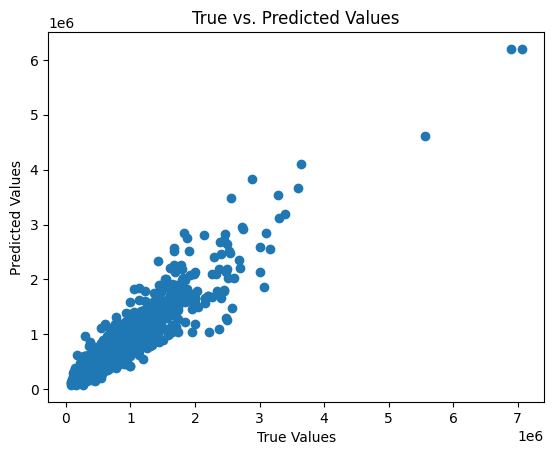

In [ ]:
# Predict on validation data
y_valid_predict = model.predict(arr_x_valid)

# Plot true vs. predicted values
plt.scatter(arr_y_valid, y_valid_predict)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

### Figure 1

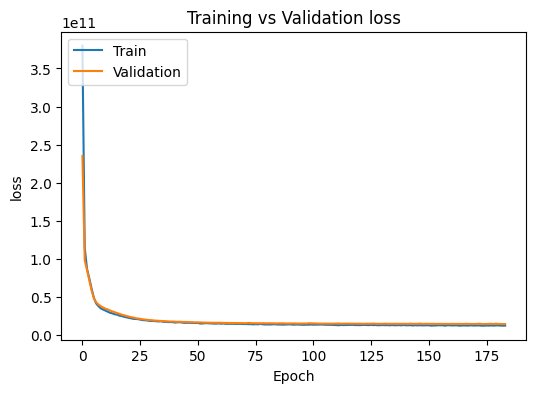

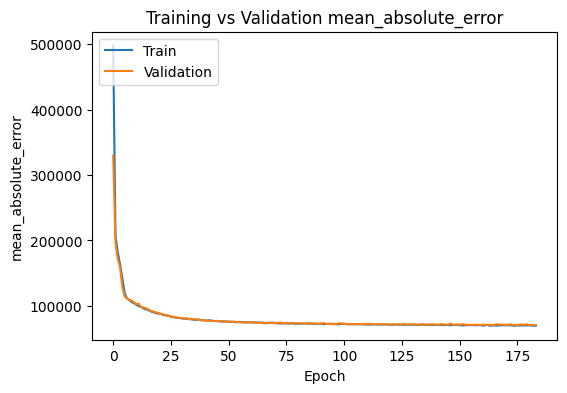

In [ ]:
hist = pd.DataFrame(history.history)
# Plot history
plot_hist(hist, xsize=6, ysize=4)

### Figures 2,3

In [ ]:
# Choose a random instance from your validation dataset
instance_index = np.random.choice(len(arr_x_valid))

x_instance = arr_x_valid[instance_index]
y_true = arr_y_valid[instance_index]

# Reshape the instance to match the input shape of your model
x_instance = np.reshape(x_instance, (1, -1))

# Use the model to make a prediction
y_pred = model.predict(x_instance)

# Print the true and predicted values
print('This is the record number ', instance_index)
print('True Value:', y_true)
print('Predicted Value:', y_pred[0])

1/1 [==============================] - 0s 29ms/step
This is the record number  723
True Value: [320000.]
Predicted Value: [401695.75]


<a id = "cell_report"></a>
## 4. Experiments Report

 In this section, the Table 1 below shows 10 different models I have used to make prediction. Similarly, the same models are used in Table 2, but in this Table, I also dealt with Multicollinearity. As can be seen from both Tables, when dealing with Multicollinearity, I have to remove too many independent variables, which result in the models in Table 2 show a worse performance compared to the one in Table 1. Because of that reason, I decided to choose best performance Model from Table 1, which is Model MLP 4 or the one I described in Section 3 of this report

## Table 1: 10 Model Metrics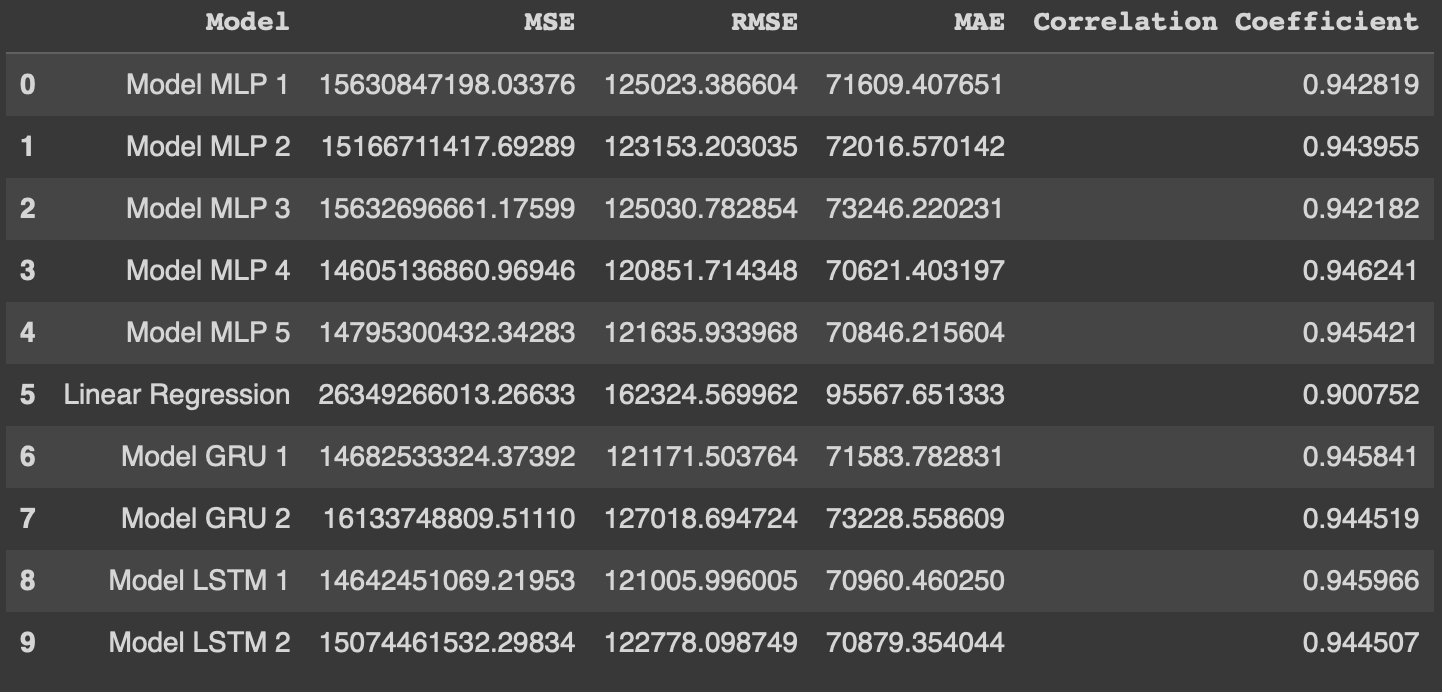

## Table 2: 10 Models Metrics (After dealing with Multicollinearity) 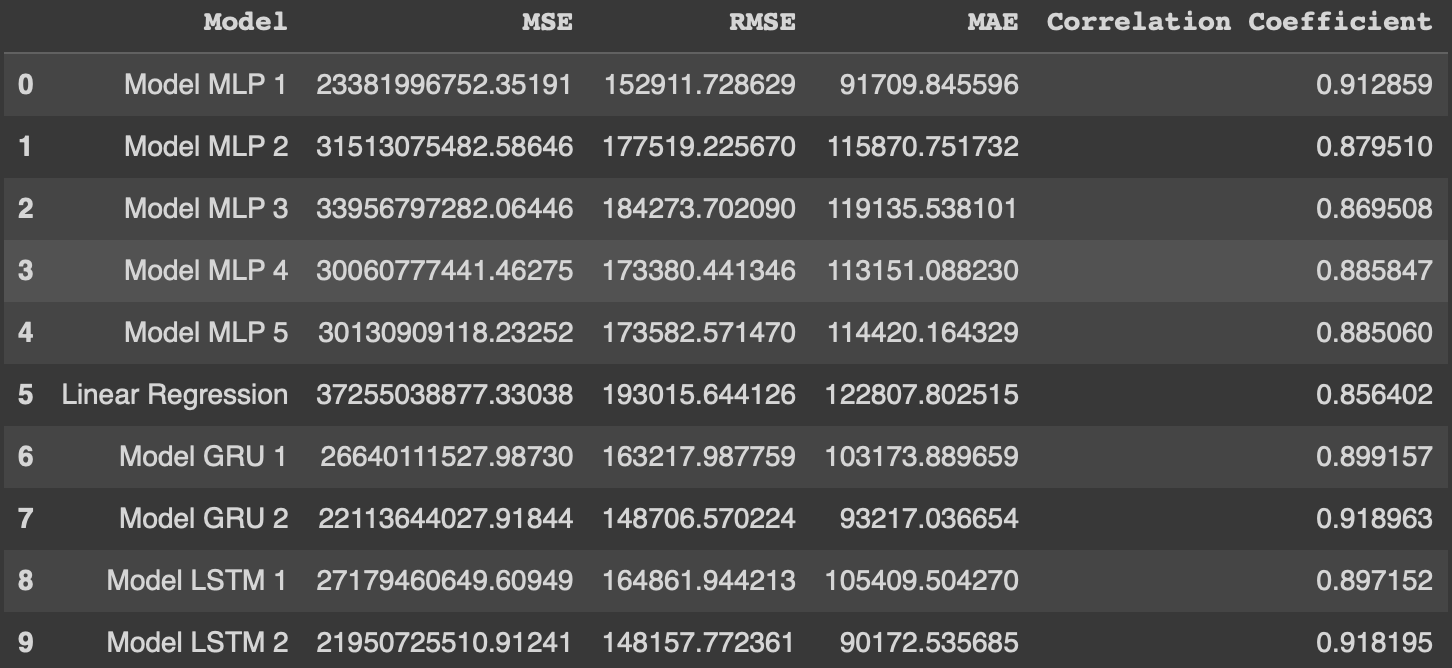

### Brief Explanation of 10 Models:
1. Model MLP 1: This is a sequential neural network model with the following architecture:
- Input layer with the same size as the feature vector
- Dense layer with 100 nodes and tanh activation
- Dropout layer with a rate of 0.2 to prevent overfitting
- Dense layer with 180 nodes and ReLU activation
- Dense layer with 20 nodes and ReLU activation
- Output dense layer with a single node. The model is compiled with mean squared error loss, RMSprop optimizer with a learning rate of 0.005, and mean absolute error as a metric.

2. Model MLP 2: This is another sequential neural network model with the following architecture:
- Input layer with the same size as the feature vector
- Dense layer with 200 nodes and ReLU activation
- Dropout layer with a rate of 0.1
- Dense layer with 100 nodes and ReLU activation
- Output dense layer with a single node. The model is compiled with mean squared error loss, Adam optimizer with default parameters, and mean absolute error as a metric.

3. Model MLP 3: This sequential neural network model has the following architecture:
- Input layer with the same size as the feature vector
- Dense layer with 128 nodes and ReLU activation
- Dropout layer with a rate of 0.2
- Dense layer with 64 nodes and ReLU activation
- Output dense layer with a single node. The model is compiled with mean squared error loss, Adam optimizer with a learning rate of 0.001, and mean absolute error as a metric.

4. Model MLP 4: This is the model I chose for the task as it has highest performance in all three metrics. For its Architecture, refer back to Section 3


5. Model MLP 5: This sequential neural network model has the following architecture:
- Input layer with the same size as the feature vector
- Dense layer with 100 nodes and ReLU activation
- Dense layer with 50 nodes and ReLU activation
- Dense layer with 25 nodes and ReLU activation
- Output dense layer with a single node. The model is compiled with mean squared error loss, RMSprop optimizer with default parameters, and mean absolute error as a metric.

6. Linear Regression Model:
- Linear regression is a simple and interpretable model that assumes a linear relationship between the input features and the target variable. It tries to find the best-fitting straight line that minimizes the sum of squared errors between the predicted and actual values.

7. Model GRU 1: This model uses a Gated Recurrent Unit (GRU) architecture, which is a type of recurrent neural network. The model has the following layers:
- GRU layer with 100 units, returning the full sequence, and ReLU activation
- Dropout layer with a rate of 0.2
- GRU layer with 50 units and ReLU activation
- Output dense layer with a single node. The model is compiled with the Adam optimizer and mean squared error loss.


8. Model GRU 2: This is another GRU-based model with the following architecture:
- GRU layer with 100 units, returning the full sequence, and tanh activation
- Dropout layer with a rate of 0.2
- GRU layer with 180 units, returning the full sequence, and ReLU activation
- GRU layer with 20 units and ReLU activation
Output dense layer with a single node. The model is compiled with mean squared error loss, RMSprop optimizer with a learning rate of 0.005, and mean absolute error as a metric.


9. Model LSTM 1: This model uses a Long Short-Term Memory (LSTM) architecture, which is another type of recurrent neural network. The model has the following layers:
- LSTM layer with 100 units, returning the full sequence, and ReLU activation
- Dropout layer with a rate of 0.2
- LSTM layer with 50 units and ReLU activation
- Output dense layer with a single node. The model is compiled with the Adam optimizer and mean squared error loss.


10. Model LSTM 2: This is another LSTM-based model with the following architecture:
- LSTM layer with 100 units, returning the full sequence, and tanh activation
- Dropout layer with a rate of 0.2
- LSTM layer with 180 units, returning the full sequence, and ReLU activation
- LSTM layer with 20 units and ReLU activation
- Output dense layer with a single node. The model is compiled with mean squared error loss, RMSprop optimizer with a learning rate of 0.005, and mean absolute error as a metric.

I. As evident from the Table 1 and a short explanation for each Model, Model MLP 4 achieved the best performance across all metrics. It has the lowest Mean Squared Error (≈14600000000), Root Mean Squared Error (≈120000), and Mean Absolute Error (≈71000), as well as the highest correlation coefficient between the predicted and true house prices (≈0.94).

II. Critically evaluating the developed solution, the neural network model (Model MLP 4) can be effectively used to address the business problem of predicting house prices for the real estate company. By leveraging the extensive set of features related to house characteristics and locations, the model can provide reasonably accurate price estimates, which can be valuable for pricing strategies, investment decisions, and market analysis.

# Reference:
TensorFlow. (n.d.). tf.keras.optimizers. TensorFlow. https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/